# Random Forest - Temperature Forecast

### Predicting the max temperature for tomorrow in our city using one year of past weather data using Random Forest

#### What data we have? 

- **one year of historical max temperatures data**

**This is a supervised, regression machine learning problem.**

# 1. Load Data

In [1]:
import pandas as pd

In [2]:
# Read in data as pandas dataframe and display first 5 rows
features = pd.read_csv('temps.csv')

In [3]:
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2019,1,1,Fri,45,45,45.6,45,29
1,2019,1,2,Sat,44,45,45.7,44,61
2,2019,1,3,Sun,45,44,45.8,41,56
3,2019,1,4,Mon,44,41,45.9,40,53
4,2019,1,5,Tues,41,40,46.0,44,41


# 2. Data Preparation

#### Preprocessing Steps

1) One-hot encoded categorical variables

2) Split data into features and labels

3) Convert to arrays

4) Split data into training and testing sets

In [4]:
print('The shape of our features is:', features.shape)

The shape of our features is: (348, 9)


### 2.1 Identify anomalies using summary statistics.

In [5]:
# Descriptive statistics for each column
features.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2019.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,15.626179
min,2019.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2019.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2019.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2019.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2019.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,95.000000


#### There are not any data points that immediately appear as anomalous and no zeros in any of the measurement columns.

In [6]:
# Use datetime for dealing with dates
import datetime

# Get years, months, and days
years = features['year']
months = features['month']
days = features['day']

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
#dates

In [7]:
dates

[datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 2, 0, 0),
 datetime.datetime(2019, 1, 3, 0, 0),
 datetime.datetime(2019, 1, 4, 0, 0),
 datetime.datetime(2019, 1, 5, 0, 0),
 datetime.datetime(2019, 1, 6, 0, 0),
 datetime.datetime(2019, 1, 7, 0, 0),
 datetime.datetime(2019, 1, 8, 0, 0),
 datetime.datetime(2019, 1, 9, 0, 0),
 datetime.datetime(2019, 1, 10, 0, 0),
 datetime.datetime(2019, 1, 11, 0, 0),
 datetime.datetime(2019, 1, 12, 0, 0),
 datetime.datetime(2019, 1, 13, 0, 0),
 datetime.datetime(2019, 1, 14, 0, 0),
 datetime.datetime(2019, 1, 15, 0, 0),
 datetime.datetime(2019, 1, 16, 0, 0),
 datetime.datetime(2019, 1, 17, 0, 0),
 datetime.datetime(2019, 1, 18, 0, 0),
 datetime.datetime(2019, 1, 19, 0, 0),
 datetime.datetime(2019, 1, 20, 0, 0),
 datetime.datetime(2019, 1, 21, 0, 0),
 datetime.datetime(2019, 1, 22, 0, 0),
 datetime.datetime(2019, 1, 23, 0, 0),
 datetime.datetime(2019, 1, 24, 0, 0),
 datetime.datetime(2019, 1, 25, 0, 0),
 datetime.datetime(2019, 1, 26, 0,

In [8]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

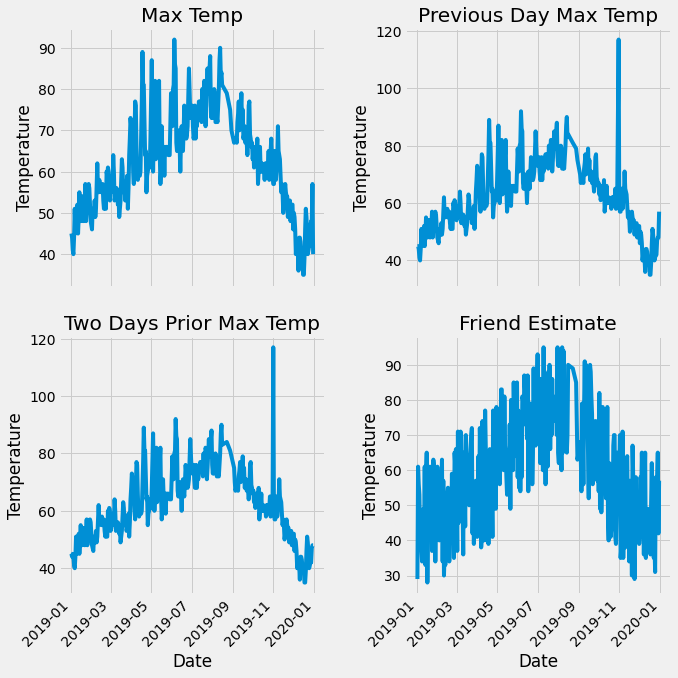

In [9]:
# Set up the plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
fig.autofmt_xdate(rotation = 45)

# Actual max temperature measurement
ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')

# Temperature from 1 day ago
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Day Max Temp')

# Temperature from 2 days ago
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

# Friend Estimate
ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

### 2.2 One-Hot Encoding

#### Takes categorical variables, such as days of the week and converts it to a numerical representation without an arbitrary ordering. 


In [10]:
# One-hot encode categorical features
features = pd.get_dummies(features)
features.head(5)

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2019,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2019,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2019,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2019,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2019,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [11]:
print('Shape of features after one-hot encoding:', features.shape)

Shape of features after one-hot encoding: (348, 15)


### 2.3 Convert Features and Labels and Convert Data to Arrays

#### 1) Separate the data into features and targets. 


In [12]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(features['actual'])

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('actual', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

### 2.4 Split the data into Training and Testing Sets

In [13]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, 
                                                                            labels, 
                                                                            test_size = 0.25,
                                                                            random_state = 42)

In [14]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (261, 14)
Training Labels Shape: (261,)
Testing Features Shape: (87, 14)
Testing Labels Shape: (87,)


# 4. Train Model

We import the random forest regression model from skicit-learn, instantiate the model, and fit (scikit-learn’s name for training) the model on the training data. (setting the random state for reproducible results).

In [17]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model - 100 trees
rf = RandomForestRegressor(n_estimators= 100, 
                           random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(random_state=42)

# 5. Make Predictions on Test Data

Our model has now been trained to learn the relationships between the features and the targets. The next step is figuring out how good the model is! To do this we make predictions on the test features (the model is never allowed to see the test answers). 

We then compare the predictions to the known answers. When performing regression, we need to make sure to use the absolute error because we expect some of our answers to be low and some to be high. 

In [18]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 3.92 degrees.


#####  Still we may not be happy

# 6. Determine Performance Metrics

In [19]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.87 %.


# 7. Improve Model - Tuning

We can create models with different hyperparameters to try and boost performance. The only way to find the best ones
are to try a few and evaluate them! 

In [20]:
rf_new = RandomForestRegressor(n_estimators = 500, 
                               criterion = 'mse', 
                               max_depth = 5
                              )
# Train the model on training data
rf_new.fit(train_features, train_labels)

RandomForestRegressor(max_depth=5, n_estimators=500)

In [21]:
# Use the forest's predict method on the test data with new model rf_new
predictions2 = rf_new.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions2 - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 3.8 degrees.


#### New model has improved the error from 3.97 to 3.81
#### We can tune other hyper paramters as well...

# 8. Variable importance and feature selection

At this point, we know our model is good, but it’s pretty much a black box. We feed in some Numpy arrays for training, ask it to make a prediction, evaluate the predictions, and see that they are reasonable. 



we can look at the feature importances of our explanatory variables.

### 8.1 Variable Importances

- In order to quantify the usefulness of all the variables in the entire random forest, we can look at the relative importances of the variables. 

- The importances returned in Skicit-learn represent how much including a particular variable improves the prediction.

In [22]:
# simplest way..
rf.feature_importances_

array([0.        , 0.01295808, 0.02494456, 0.0227458 , 0.72733161,
       0.16517316, 0.02492068, 0.00455151, 0.00267595, 0.0050325 ,
       0.00300585, 0.00161419, 0.00254124, 0.00250488])

In [23]:
# Get numerical feature importances - Represent in a better way
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [24]:
# Print out the feature and importances 
[print('Variable: {:15} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1          Importance: 0.73
Variable: average         Importance: 0.17
Variable: day             Importance: 0.02
Variable: temp_2          Importance: 0.02
Variable: friend          Importance: 0.02
Variable: month           Importance: 0.01
Variable: week_Sat        Importance: 0.01
Variable: year            Importance: 0.0
Variable: week_Fri        Importance: 0.0
Variable: week_Mon        Importance: 0.0
Variable: week_Sun        Importance: 0.0
Variable: week_Thurs      Importance: 0.0
Variable: week_Tues       Importance: 0.0
Variable: week_Wed        Importance: 0.0


- First, At the top of the list is temp_1, the max temperature of the day before. This tells us the best predictor of the max temperature for a day is the max temperature of the day before, a rather intuitive finding. 

- The second most important factor is the historical average max temperature, also not that surprising. 

- Your friend turns out to not be very helpful, along with the day of the week, the year, the month, and the temperature 2 days prior. 

- These importances all make sense as we would not expect the day of the week to be a predictor of maximum temperature as it has nothing to do with weather. 

- Moreover, the year is the same for all data points and hence provides us with no information for predicting the max temperature.

### 8.2 Model with Two Most Important Features

we can remove those variables that have no importance and the performance will not suffer. Additionally, if we are using a different model, say a support vector machine, we could use the random forest feature importances as a kind of feature selection method.

In [25]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, 
                                          random_state=42)

# Extract the two most important features
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.92 degrees.
Accuracy: 93.76 %.


This tells us that we actually do not need all the data we collected to make accurate predictions! If we were to continue using this model, we could only collect the two variables and achieve nearly the same performance. In a production setting, we would need to weigh the decrease in accuracy versus the extra time required to obtain more information. 

## 8.3 Visualizations

### 8.3.1 Variable Importances

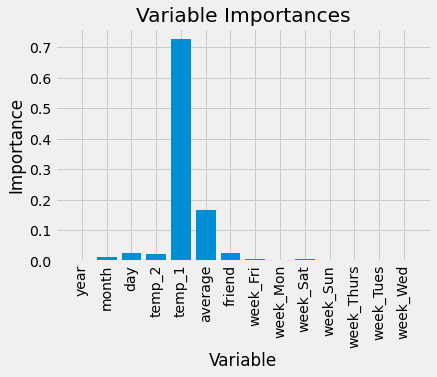

In [26]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

### 8.3.2. Predictions and Actual Values

we can plot the entire dataset with predictions highlighted. This requires a little data manipulation, but its not too difficult. We can use this plot to determine if there are any outliers in either the data or our predictions.

In [27]:
# Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]

# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions}) 

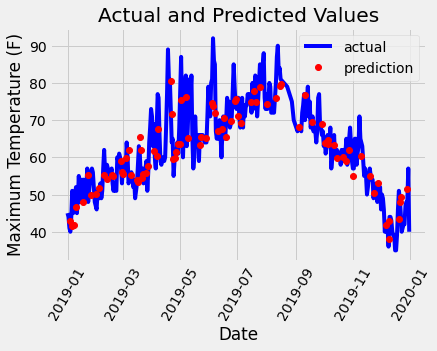

In [28]:
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');


### Targets and Data Visualization

The previous graph doesn’t look as if we have any noticeable outliers that need to be corrected. To further diagnose the model, we can plot residuals (the errors) to see if our model has a tendency to over-predict or under-predict, and we can also see if the residuals are normally distributed. However, I will just make one final chart showing the actual values, the temperature one day previous, the historical average, and our friend’s prediction. This will allow us to see the difference between useful variables and those that aren’t so helpful.

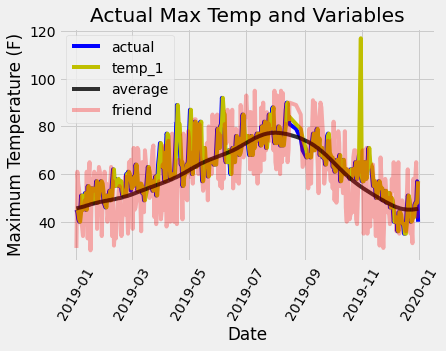

In [29]:
# Make the data accessible for plotting
true_data['temp_1'] = features[:, feature_list.index('temp_1')]
true_data['average'] = features[:, feature_list.index('average')]
true_data['friend'] = features[:, feature_list.index('friend')]

# Plot all the data as lines
plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['temp_1'], 'y-', label  = 'temp_1', alpha = 1.0)
plt.plot(true_data['date'], true_data['average'], 'k-', label = 'average', alpha = 0.8)
plt.plot(true_data['date'], true_data['friend'], 'r-', label = 'friend', alpha = 0.3)

# Formatting plot
plt.legend(); plt.xticks(rotation = '60');

# Lables and title
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual Max Temp and Variables');

we can see why the max temperature one day prior and the historical max temperature are useful for predicting max temperature while our friend is not